# Future Ready Skills Grab Challenge: Safety Telematics Dataset


- The telematics data collected during driving trips are useful to detect if the trip is dangerous and has high crash / accident probability.
- Which feature has a high impact on indicating dangerous trips?
- How does the driving behaviour change over time (second) for normal trips and dangerous trips? What are the behaviour difference?
- Given the telematics data for new trips,  derive a model to detect if the trip is a dangerous trip.

# Some useful python libraries

In [1]:
# remove unneccessary warning
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# importing the modules PAndas and Numpy
import numpy as np
import pandas as pd

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
# importing visualisation tools
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.features.rankd import Rank1D, Rank2D

In [5]:
# import data encoding tools
from sklearn import preprocessing
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [6]:
# importing Classifier Modules
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [7]:
# importing evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

# Data Importing: Features

In [8]:
df = pd.read_csv('grab/final_data.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16135561 entries, 0 to 16135560
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bookingID       int64  
 1   Accuracy        float64
 2   Bearing         float64
 3   acceleration_x  float64
 4   acceleration_y  float64
 5   acceleration_z  float64
 6   gyro_x          float64
 7   gyro_y          float64
 8   gyro_z          float64
 9   second          float64
 10  Speed           float64
dtypes: float64(10), int64(1)
memory usage: 1.3 GB


In [10]:
df.nunique()

bookingID           20000
Accuracy            49191
Bearing           2025092
acceleration_x    1308634
acceleration_y    1216585
acceleration_z    1941793
gyro_x            3104790
gyro_y            3404533
gyro_z            2611366
second               8266
Speed             6196574
dtype: int64

In [11]:
df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.000,1.229,8.900,3.987,0.008,0.002,-0.010,1362.000,0.000
1,274877907034,9.293,17.000,0.033,8.660,4.737,0.025,0.004,-0.011,257.000,0.190
2,884763263056,3.000,189.000,1.140,9.546,1.951,-0.007,-0.015,0.001,973.000,0.667
3,1073741824054,3.900,126.000,3.872,10.386,-0.136,0.001,-0.340,-0.018,902.000,7.913
4,1056561954943,3.900,50.000,-0.113,10.551,-1.560,0.131,-0.062,0.162,820.000,20.419


In [12]:
df['bookingID'].value_counts()

438086664371     7561
1374389534819    4499
34359738469      4302
1108101562533    3925
747324309632     3674
                 ... 
1537598292022     120
180388626478      120
317827579936      120
472446402608      120
1571958030400     120
Name: bookingID, Length: 20000, dtype: int64

In [13]:
df.sort_values(by=['bookingID','second'],ascending=True)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
10835302,0,12.000,143.298,0.818,-9.941,-2.015,-0.016,-0.094,0.071,0.000,3.443
12007854,0,8.000,143.298,0.546,-9.836,-2.039,-0.047,-0.079,0.043,1.000,0.228
3394723,0,8.000,143.298,-1.706,-9.271,-1.209,-0.029,-0.033,0.015,2.000,0.228
436147,0,8.000,143.298,-1.417,-9.548,-1.861,-0.022,0.005,-0.026,3.000,0.228
9490986,0,8.000,143.298,-0.598,-9.854,-1.379,-0.014,-0.046,0.022,4.000,0.228
...,...,...,...,...,...,...,...,...,...,...,...
15432166,1709396983975,8.000,199.547,-0.321,-8.950,-3.972,-0.013,0.016,-0.008,559.000,1.036
13841943,1709396983975,8.000,199.547,-0.418,-8.929,-3.950,-0.006,0.005,-0.000,560.000,1.036
14785606,1709396983975,12.000,199.547,-0.227,-8.915,-4.339,0.045,0.032,-0.019,561.000,0.302
12850183,1709396983975,12.000,199.547,-0.373,-8.951,-4.417,0.053,0.029,-0.016,562.000,0.302


# Data Importing: Label

In [14]:
label = pd.read_csv('grab/label.csv')

In [15]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20018 entries, 0 to 20017
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   bookingID  20018 non-null  int64
 1   label      20018 non-null  int64
dtypes: int64(2)
memory usage: 312.9 KB


In [16]:
label.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


In [17]:
label['bookingID'].value_counts()

1391569403991    2
154618822837     2
481036337234     2
919123001348     2
1511828488211    2
                ..
1288490188864    1
146028888214     1
1649267441800    1
214748364845     1
824633720928     1
Name: bookingID, Length: 20000, dtype: int64

In [18]:
# drop duplicate bookingid label and only keep the last label
label.drop_duplicates(subset='bookingID' , keep='last', inplace=True)

In [19]:
label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 20017
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   bookingID  20000 non-null  int64
 1   label      20000 non-null  int64
dtypes: int64(2)
memory usage: 468.8 KB


In [20]:
label.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


# Merge features and label data

In [21]:
df = pd.merge(df, label, on="bookingID")
df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,1202590843006,3.000,353.000,1.229,8.900,3.987,0.008,0.002,-0.010,1362.000,0.000,1
1,1202590843006,3.033,77.000,1.137,8.975,3.981,0.021,-0.023,0.025,541.000,0.000,1
2,1202590843006,6.173,283.000,1.523,7.947,5.075,0.138,-0.297,-0.017,154.000,2.863,1
3,1202590843006,3.014,353.000,1.135,8.932,3.929,-0.008,-0.021,-0.023,1384.000,0.000,1
4,1202590843006,5.209,340.000,0.858,9.078,2.945,0.062,0.015,0.026,1142.000,9.750,1


# Feature exploration

In [22]:
df.isnull().sum()

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
label             0
dtype: int64

In [23]:
df['label'].value_counts()

0    11207142
1     4928419
Name: label, dtype: int64

In [24]:
df['label'].value_counts(normalize=True) * 100

0   69.456
1   30.544
Name: label, dtype: float64

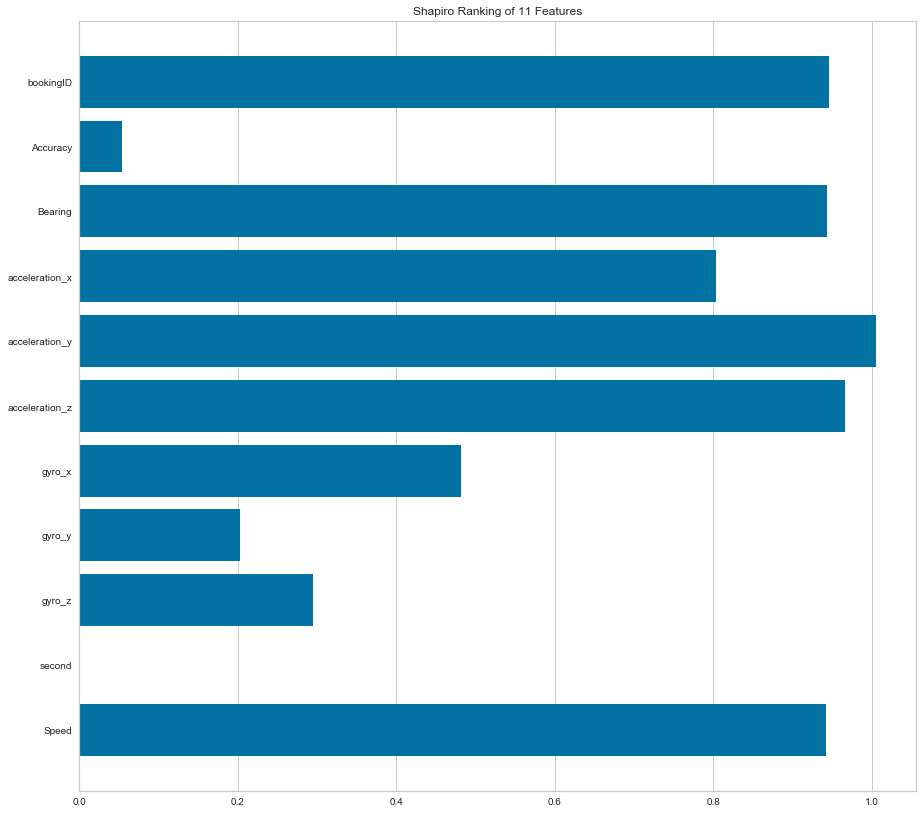

In [25]:
Y = df['label']
X = df.drop("label",axis=1)

visualizer = Rank1D(algorithm='shapiro', size=(1080, 1020))
visualizer.fit(X, Y)
visualizer.transform(X)
visualizer.show()

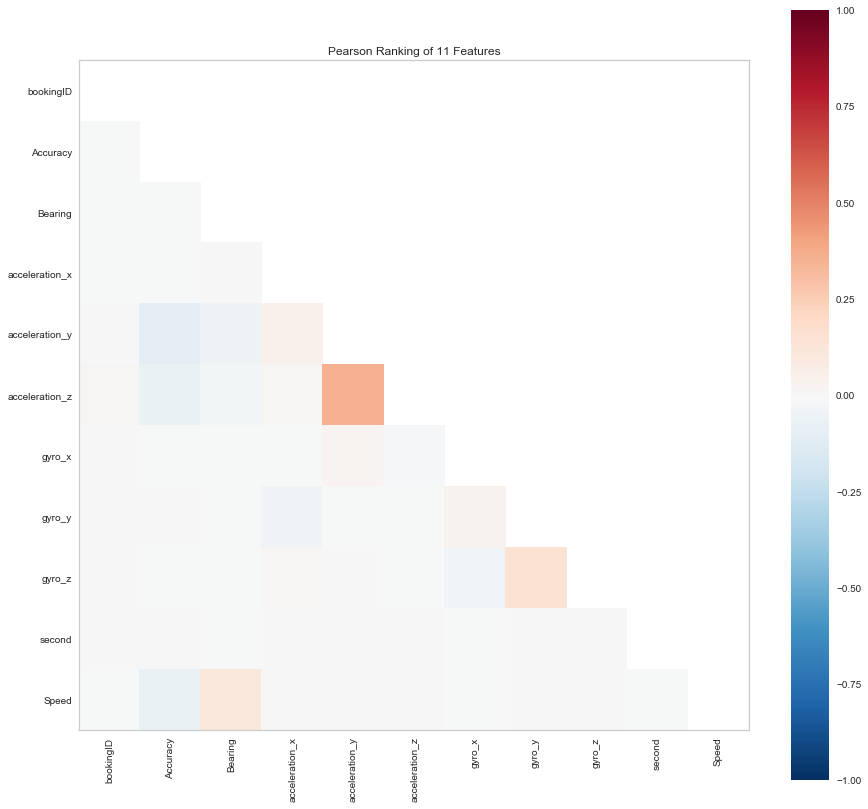

In [26]:
visualizer = Rank2D(algorithm='pearson', size=(1080, 1020))
visualizer.fit(X, Y)
visualizer.transform(X)
visualizer.show()

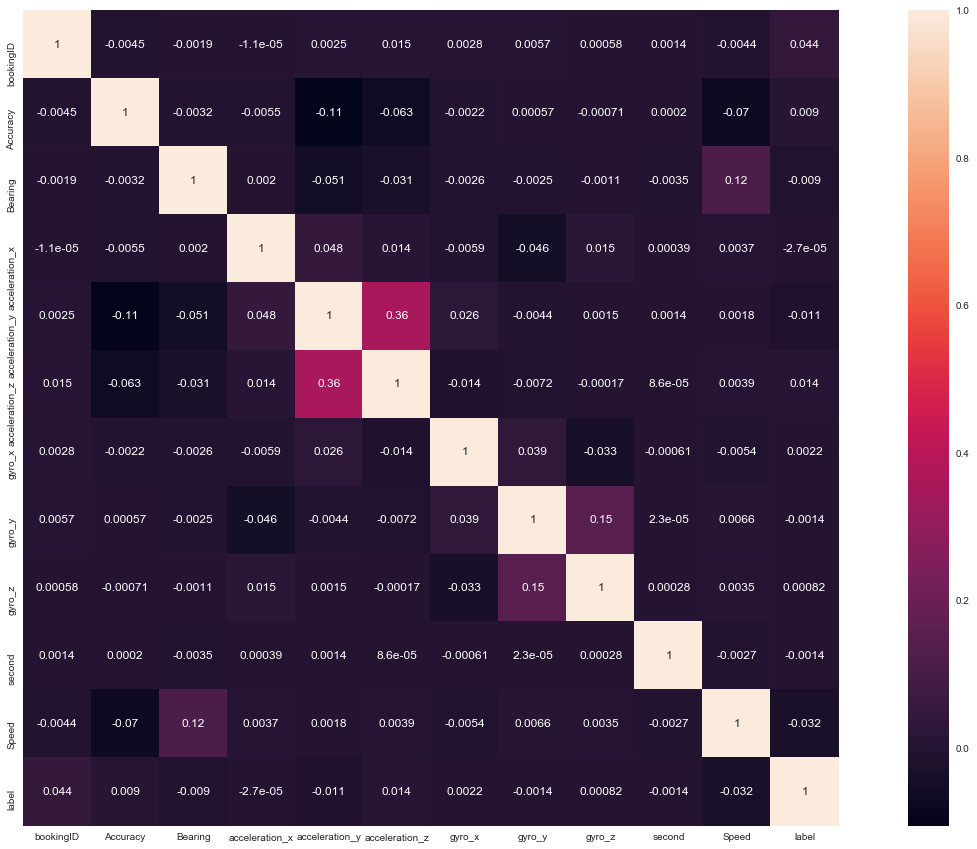

In [27]:
plt.figure(figsize=(25,15))
ax = sns.heatmap(df.corr(), square=True, annot=True)

# Feature engineering

### Removing data with GPS Accuracy > 30m
- According to a study by Findyr and placeIQ, the average mobile location data is accurate to 30m.

https://www.placeiq.com/2016/10/location-data-accuracy-the-fast-factors/

In [28]:
df = df[df["Accuracy"] < 30]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15708710 entries, 0 to 16135560
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bookingID       int64  
 1   Accuracy        float64
 2   Bearing         float64
 3   acceleration_x  float64
 4   acceleration_y  float64
 5   acceleration_z  float64
 6   gyro_x          float64
 7   gyro_y          float64
 8   gyro_z          float64
 9   second          float64
 10  Speed           float64
 11  label           int64  
dtypes: float64(10), int64(2)
memory usage: 1.5 GB


In [29]:
data = pd.DataFrame()
for col in df.columns:
    if col != "bookingID" and col != "label" and col != "Accuracy" and col != "second" and col != "Bearing" and col != "gyro_x" and col != "gyro_y" and col != "gyro_z":
        temp = df.groupby("bookingID")[col].agg(["mean", "sum", "max", "min"])
        data[col + "_mean"] = temp["mean"]
        data[col + "_sum"] = temp["sum"]
        data[col + "_max"] = temp["max"]
        data[col + "_min"] = temp["min"]
        
data.reset_index(drop=True, inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19970 entries, 0 to 19969
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   acceleration_x_mean  19970 non-null  float64
 1   acceleration_x_sum   19970 non-null  float64
 2   acceleration_x_max   19970 non-null  float64
 3   acceleration_x_min   19970 non-null  float64
 4   acceleration_y_mean  19970 non-null  float64
 5   acceleration_y_sum   19970 non-null  float64
 6   acceleration_y_max   19970 non-null  float64
 7   acceleration_y_min   19970 non-null  float64
 8   acceleration_z_mean  19970 non-null  float64
 9   acceleration_z_sum   19970 non-null  float64
 10  acceleration_z_max   19970 non-null  float64
 11  acceleration_z_min   19970 non-null  float64
 12  Speed_mean           19970 non-null  float64
 13  Speed_sum            19970 non-null  float64
 14  Speed_max            19970 non-null  float64
 15  Speed_min            19970 non-null 

In [31]:
data.head()

,acceleration_x_mean,acceleration_x_sum,acceleration_x_max,acceleration_x_min,acceleration_y_mean,acceleration_y_sum,acceleration_y_max,acceleration_y_min,acceleration_z_mean,acceleration_z_sum,acceleration_z_max,acceleration_z_min,Speed_mean,Speed_sum,Speed_max,Speed_min
0,-0.709,-710.620,4.783,-4.692,-9.612,-9631.311,-6.120,-12.765,-1.619,-1622.125,2.319,-6.252,9.003,9021.211,22.946,0.064
1,-0.525,-447.121,3.813,-5.353,9.532,8111.805,12.536,6.623,-2.199,-1871.348,1.481,-5.355,7.882,6707.231,21.882,-1.000
2,0.307,59.823,1.956,-2.971,9.843,1919.421,13.334,7.942,0.139,27.173,2.313,-3.283,3.157,615.657,9.360,0.000
3,-0.365,-399.439,2.020,-2.866,-9.406,-10290.644,-7.065,-18.848,-2.614,-2859.321,0.296,-9.375,6.151,6729.190,19.780,0.000
4,0.491,537.225,5.593,-4.353,9.538,10444.157,13.250,6.469,2.355,2578.790,7.978,-2.140,4.629,5068.669,16.395,0.000


In [32]:
df1 = df.groupby(['bookingID'],as_index=False).mean()

In [33]:
df1.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,0,10.106,176.311,-0.709,-9.612,-1.619,0.004,-0.006,-0.004,902.936,9.003,0
1,1,3.719,124.199,-0.525,9.532,-2.199,-0.002,-0.008,0.000,581.175,7.882,1
2,2,3.931,173.795,0.307,9.843,0.139,0.006,-0.013,0.003,339.441,3.157,1
3,4,10.000,151.807,-0.365,-9.406,-2.614,-0.023,0.023,-0.000,547.495,6.151,1
4,6,4.587,197.813,0.491,9.538,2.355,0.004,0.000,0.003,547.000,4.629,0


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19970 entries, 0 to 19969
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bookingID       19970 non-null  int64  
 1   Accuracy        19970 non-null  float64
 2   Bearing         19970 non-null  float64
 3   acceleration_x  19970 non-null  float64
 4   acceleration_y  19970 non-null  float64
 5   acceleration_z  19970 non-null  float64
 6   gyro_x          19970 non-null  float64
 7   gyro_y          19970 non-null  float64
 8   gyro_z          19970 non-null  float64
 9   second          19970 non-null  float64
 10  Speed           19970 non-null  float64
 11  label           19970 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.0 MB


In [35]:
data2 = df1['label']
data2.head()

0    0
1    1
2    1
3    1
4    0
Name: label, dtype: int64

In [36]:
final = pd.merge(data, data2, left_index=True, right_index=True)
final.head()

,acceleration_x_mean,acceleration_x_sum,acceleration_x_max,acceleration_x_min,acceleration_y_mean,acceleration_y_sum,acceleration_y_max,acceleration_y_min,acceleration_z_mean,acceleration_z_sum,acceleration_z_max,acceleration_z_min,Speed_mean,Speed_sum,Speed_max,Speed_min,label
0,-0.709,-710.620,4.783,-4.692,-9.612,-9631.311,-6.120,-12.765,-1.619,-1622.125,2.319,-6.252,9.003,9021.211,22.946,0.064,0
1,-0.525,-447.121,3.813,-5.353,9.532,8111.805,12.536,6.623,-2.199,-1871.348,1.481,-5.355,7.882,6707.231,21.882,-1.000,1
2,0.307,59.823,1.956,-2.971,9.843,1919.421,13.334,7.942,0.139,27.173,2.313,-3.283,3.157,615.657,9.360,0.000,1
3,-0.365,-399.439,2.020,-2.866,-9.406,-10290.644,-7.065,-18.848,-2.614,-2859.321,0.296,-9.375,6.151,6729.190,19.780,0.000,1
4,0.491,537.225,5.593,-4.353,9.538,10444.157,13.250,6.469,2.355,2578.790,7.978,-2.140,4.629,5068.669,16.395,0.000,0


# Train Model

## Split Data into Train and Test Sets

In [37]:
Y = final['label']
X = final.drop(['label'], axis=1)

In [38]:
X.head()

,acceleration_x_mean,acceleration_x_sum,acceleration_x_max,acceleration_x_min,acceleration_y_mean,acceleration_y_sum,acceleration_y_max,acceleration_y_min,acceleration_z_mean,acceleration_z_sum,acceleration_z_max,acceleration_z_min,Speed_mean,Speed_sum,Speed_max,Speed_min
0,-0.709,-710.620,4.783,-4.692,-9.612,-9631.311,-6.120,-12.765,-1.619,-1622.125,2.319,-6.252,9.003,9021.211,22.946,0.064
1,-0.525,-447.121,3.813,-5.353,9.532,8111.805,12.536,6.623,-2.199,-1871.348,1.481,-5.355,7.882,6707.231,21.882,-1.000
2,0.307,59.823,1.956,-2.971,9.843,1919.421,13.334,7.942,0.139,27.173,2.313,-3.283,3.157,615.657,9.360,0.000
3,-0.365,-399.439,2.020,-2.866,-9.406,-10290.644,-7.065,-18.848,-2.614,-2859.321,0.296,-9.375,6.151,6729.190,19.780,0.000
4,0.491,537.225,5.593,-4.353,9.538,10444.157,13.250,6.469,2.355,2578.790,7.978,-2.140,4.629,5068.669,16.395,0.000


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [40]:
X_test.head()

,acceleration_x_mean,acceleration_x_sum,acceleration_x_max,acceleration_x_min,acceleration_y_mean,acceleration_y_sum,acceleration_y_max,acceleration_y_min,acceleration_z_mean,acceleration_z_sum,acceleration_z_max,acceleration_z_min,Speed_mean,Speed_sum,Speed_max,Speed_min
13256,-1.566,-1401.213,3.338,-5.491,9.623,8612.931,16.060,5.659,1.773,1586.986,7.787,-2.209,9.667,8651.980,20.250,0.000
12366,0.832,461.887,5.813,-4.642,9.584,5319.142,16.087,3.728,-0.013,-7.097,11.433,-8.773,7.545,4187.631,24.926,-1.000
5814,0.074,19.887,4.006,-4.036,9.475,2539.229,12.365,6.113,2.597,695.924,8.465,-2.559,15.712,4210.840,23.670,-1.000
15702,-0.442,-249.544,11.509,-7.968,-8.395,-4734.740,2.264,-12.279,-2.893,-1631.540,5.406,-15.021,4.937,2784.690,19.460,0.000
8061,-0.128,-168.816,3.445,-3.405,9.393,12398.414,12.606,6.658,2.733,3607.363,6.989,0.292,6.596,8706.230,22.445,0.000


In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15976, 16)
(15976,)
(3994, 16)
(3994,)


## Train Model with Algorithm: Random Forest Classifier

In [42]:
model = GradientBoostingClassifier(random_state=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
model = RandomForestClassifier(random_state=10, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Score and Evaluate Model

## Score Model and Evaluate Model with: Random Forest Classifier

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.771907861792689
f1-acore: 0.2775574940523394
confusion matrix:
 [[2908   99]
 [ 812  175]]
Precision: 0.6386861313868614
Recall_score: 0.1773049645390071
Misclassified : 911


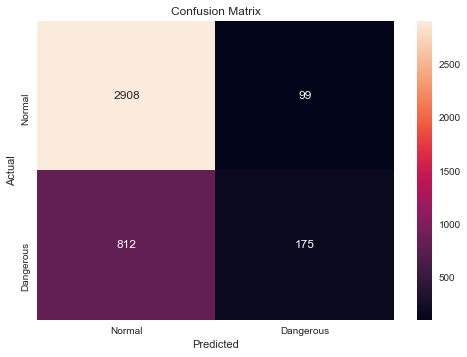

In [45]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Dangerous'])
ax.yaxis.set_ticklabels(['Normal', 'Dangerous']);

In [46]:
# feature importance
# display the relative importance of each attribute
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances[0:20]

,importance
acceleration_y_sum,0.089
Speed_mean,0.079
Speed_max,0.073
Speed_sum,0.070
acceleration_z_min,0.067
acceleration_z_max,0.067
acceleration_x_min,0.065
acceleration_x_max,0.065
acceleration_y_min,0.064
acceleration_y_mean,0.060


In [47]:
import pickle

grab = "grab_aiml.pkl"  

with open(grab, 'wb') as file:  
    pickle.dump(model, file)